# DATA VISUALISATION for dublin bikes and dublin weather  

# Initial Statements, Setup & File access 

Words "Column", "Features", "Feature vectors" are used synonymously to indicate a feature of data.

In [126]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from tabulate import tabulate

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [127]:
# read in data from csv file to pandas dataframe.  
bikeStatic = pd.read_csv('dBikeS.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
bikeDynamic = pd.read_csv('dBikeD.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
weather = pd.read_csv('dWeatherD.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# 1. Data Quality Report

 - **Scope of stage 1**
     - Data is not dropped unless for rows are duplicated.
     - Data within a feature is manipulated only with mathematical operation. Data is not altered with reference to data in other features.
     - Null values are not treated/ replaced with a unique name. They are preserved for stage2 operations.

## 1.1 Data view and formatting for Dublin bike dynamic data

### 1.1.1 Check details about number of data samples and attributes in data

In [128]:
bikeDynamic.shape

(369160, 8)

### 1.1.2 List sample head and tail rows of data

#### Sample first 5 rows 

In [129]:
bikeDynamic.head()

,id_Entry,number,status,bike_stands,available_bike_stands,available_bikes,last_update,data_entry_timestamp
0,1745,42,OPEN,30,17,13,2020-02-28 14:55:41,2020-02-28 15:00:04
1,1746,30,OPEN,20,16,4,2020-02-28 14:59:32,2020-02-28 15:00:04
2,1747,54,OPEN,33,22,9,2020-02-28 14:54:01,2020-02-28 15:00:04
3,1748,108,OPEN,40,37,3,2020-02-28 14:59:44,2020-02-28 15:00:04
4,1749,56,OPEN,40,13,27,2020-02-28 14:52:20,2020-02-28 15:00:04


#### Sample last 5 rows 

In [130]:
bikeDynamic.tail()

,id_Entry,number,status,bike_stands,available_bike_stands,available_bikes,last_update,data_entry_timestamp
369155,370900,39,OPEN,20,6,14,2020-03-24 11:37:49,2020-03-24 11:40:02
369156,370901,83,OPEN,40,27,13,2020-03-24 11:35:57,2020-03-24 11:40:02
369157,370902,92,OPEN,40,25,15,2020-03-24 11:38:08,2020-03-24 11:40:02
369158,370903,21,OPEN,30,22,8,2020-03-24 11:31:46,2020-03-24 11:40:02
369159,370904,88,OPEN,30,9,21,2020-03-24 11:35:03,2020-03-24 11:40:02


**Results**:
 - Column "id_Entry" is possibly a key column uniquely identifying a station.
 - No duplicate column pairs are present in lay man observation
 - Spreadsheet program shows that all values logged in database are normal and nothing unregulated found.

### 1.1.3 Convert features to apropriate data types

#### 1.1.3.1 Count number of distinct values assumed by data for each feature  

In [131]:
# Gather information related to identifiers for instacnes, count of instances and count of unique instances for all features. 
# This information is stored into a csv.  

bikeDynamic_count = pd.DataFrame(
    [column, str(bikeDynamic[column].count()), str(len(bikeDynamic[column].unique())),\
    round((len(bikeDynamic[column].unique()) / bikeDynamic[column].count()),6)] for column in bikeDynamic.columns.values\
    )
bikeDynamic_count.columns = ['Features', 'Instances', 'Unique Instances','unique instances : Total instances']

bikeDynamic_count

,Features,Instances,Unique Instances,unique instances : Total instances
0,id_Entry,369160,369160,1.000000
1,number,369160,110,0.000298
2,status,369160,2,0.000005
3,bike_stands,369160,17,0.000046
4,available_bike_stands,369160,41,0.000111
5,available_bikes,369160,41,0.000111
6,last_update,369160,311646,0.844203
7,data_entry_timestamp,369160,3356,0.009091


#### 1.1.3.2 Enlist preassigned data types 

In [132]:
print(tabulate(pd.DataFrame(bikeDynamic.dtypes), headers=["Feature", "Data Type"]), "\n\n\n")

Feature                Data Type
---------------------  -----------
id_Entry               int64
number                 int64
status                 object
bike_stands            int64
available_bike_stands  int64
available_bikes        int64
last_update            object
data_entry_timestamp   object 





#### 1.1.3.3 Decide data types to be assigned to each feature 

 - id_Entry is primary keey for the dataset.
 - Examination of CSV as a spreadsheet helps to **substantiate speculation** about actual data types: <br>

| Features                  | Data Classification| Subtype    | Discription    |
|:------------------------- |:------------------ |:---------- |:-------------- | 
| id_Entry                  | numeric            | discrete | Primary key for database|
| number                    | numeric            | discrete | staion id|
| status                    | catagorical        | nominal    | station is operational or closed |
| bike_stands               | numeric            | discrete   | total number of stands at station|
| available_bike_stands     | numeric            | discrete   | available bikes at station|
| available_bikes           | numeric            | discrete   | available parking slots at station|
| last_update               | datetime           | discrete   | last update to API serivce server by station|
| data_entry_timestamp      | datetime           | discrete   | time of data entry into server; not relevent for analysis|

#### 1.1.3.4 Convert to decided data type 

In [133]:
#CATAGORICAL DATA

# Select columns containing categorical data
categorical_columns = bikeDynamic[['status']].columns

# Assign data type category to columns listed in categorical_columns
for column in categorical_columns:
    bikeDynamic[column] = bikeDynamic[column].astype('category') 

In [134]:
#CONTINUOUS DATA

# Select columns containing continuous data
continous_columns = bikeDynamic[['id_Entry', 'number','bike_stands','available_bike_stands','available_bikes']].columns

# Assign data type int64 to columns listed in continuous_columns
for column in continous_columns:
    bikeDynamic[column] = bikeDynamic[column].astype('int64')

In [135]:
#DATETIME DATA

# Select columns containing datetime data
continous_date_columns = bikeDynamic[['last_update', 'data_entry_timestamp']].columns

# Assign object type datetime to columns enlisted in continous_date_columns
for column in continous_date_columns:
    bikeDynamic[column] = pd.to_datetime(bikeDynamic[column])

#### 1.1.3.5 Varify correct data type casting of features 

In [136]:
print(tabulate(pd.DataFrame(bikeDynamic.dtypes), headers=["Feature", "Data Type"]), "\n\n\n")

Feature                Data Type
---------------------  --------------
id_Entry               int64
number                 int64
status                 category
bike_stands            int64
available_bike_stands  int64
available_bikes        int64
last_update            datetime64[ns]
data_entry_timestamp   datetime64[ns] 





### 1.1.4 Drop duplicates

In [137]:
# Check for duplicate rows
#Print the number of duplicate rows, without the original rows that were duplicated

# Check for duplicate rows for primary key "id_Entry"
print('Number of duplicate (excluding first) rows in the table is: ', bikeDynamic.duplicated(subset = "id_Entry").sum()) 

# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', bikeDynamic[bikeDynamic.duplicated(subset = "id_Entry",keep=False)].shape[0])


Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [138]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
# Since cardinality of data is huge and ever increasing; and we just need to see if NO DUPLICATES EXIST; hence subset of database is taken.

bikeDynamicT = bikeDynamic.head(1000).T

# Check for duplicate columns.
print("Number of duplicate (excluding first) columns in the table is: ", bikeDynamicT.duplicated().sum())

#Print the number of duplicates, including the original columns that were duplicated
print("Number of duplicate (including first) columns in the table is: ",  bikeDynamicT[bikeDynamicT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


**Result : Duplicate columns (features) do exist**
 - Rows : Duplicate samples do not exist. id_Entry has (unique values : total values ratio) = 1. Logically, its a primary key for the dataset. Hence, duplicacies are checked with its respect and none are found.
 - Columns : Duplicate samples do not exist. 

### 1.1.5 Check constant features

#### 1.1.5.1 Catagorical features 

In [139]:
# Print table with categorical statistics
bikeDynamic.select_dtypes(['category']).describe().T

,count,unique,top,freq
status,369160,2,OPEN,368762


**Categorical Data** 
- Reviewing the categorical data below we can see all unique values > 1



#### 1.1.5.2 Continuous features 

In [140]:
# Print table with continuous statistics
bikeDynamic.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
id_Entry,369160.0,186324.500000,106567.457024,1745.0,94034.75,186324.5,278614.25,370904.0
number,369160.0,60.518182,33.767629,2.0,31.00,61.5,90.00,117.0
bike_stands,369160.0,32.181818,7.650538,16.0,29.00,30.0,40.00,40.0
available_bike_stands,369160.0,20.243837,10.777296,0.0,12.00,20.0,29.00,40.0
available_bikes,369160.0,11.845671,9.533751,0.0,4.00,10.0,18.00,40.0


**Continuous Data** 
- No continuous feature has a non zero standard deviation.  
- This implies that feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

#### 1.1.5.3 DateTime features 

In [141]:
# Print table with continuous statistics
bikeDynamic.select_dtypes(include=['datetime']).describe().T

,count,unique,top,freq,first,last
last_update,369160,311646,2020-03-13 21:14:38,116,2020-02-28 14:49:57,2020-03-24 11:39:04
data_entry_timestamp,369160,3356,2020-03-19 03:40:02,110,2020-02-28 15:00:04,2020-03-24 11:40:02


**DateTime Data** 
- Reviewing the datetime data below we can see all unique values > 1 

Though this is not catagorical data, it is valid to say that last_update being same for multiple stations is a likely possibility. So is case for data_entry_timestamp; which represents time of data entry into database by data scraper.

**Result : No constant Features found in dataset**

### 1.1.6 Check for null values in features

In [142]:
print("Features".ljust(20," "),"Null instances","\n\n")
bikeDynamic.isnull().sum()

Features             Null instances 




id_Entry                 0
number                   0
status                   0
bike_stands              0
available_bike_stands    0
available_bikes          0
last_update              0
data_entry_timestamp     0
dtype: int64

**Result : No null values found**

## 1.2 Data cleansing and discriptive statistics

### 1.2.1 Varify cardinality 

#### 1.2.1.1 Catagorical features 

In [143]:
# Check for irregular cardinality & permitted values in categorical features.
columns = list(bikeDynamic.select_dtypes(['category']).columns.values)
for column in columns: 
    print("Feature:",column,"\tCardinality:",str(len(bikeDynamic[column].unique())),"\n",pd.unique(bikeDynamic[column].ravel()),"\n\n")

Feature: status 	Cardinality: 2 
 [OPEN, CLOSED]
Categories (2, object): [OPEN, CLOSED] 




In [144]:
# For each catagorical feature, display the number of instances each of its values has.
columns = list(bikeDynamic.select_dtypes(['category']).columns.values)
for column in columns:
    featureDetail = column+"   Cardinality:"+str(len(bikeDynamic[column].unique()))
    print(featureDetail,"\n{}\n".format('-'*len(str(featureDetail))))
    print(tabulate(pd.DataFrame(bikeDynamic[column].value_counts().nlargest(15)), headers=["Instance", "Number of Instances"]), "\n\n\n")


status   Cardinality:2 
----------------------

Instance      Number of Instances
----------  ---------------------
OPEN                       368762
CLOSED                        398 





**Values of cardinality of catagorical features are regular and within normal consideration.** 
 - Almost stations are 'OPEN'.
 - Only 0.1% times station entry is 'CLOSED'

#### 1.2.1.2 Continuous features 

In [145]:
# Check for irregular cardinality & permitted values in continuous features.
columns = list(bikeDynamic.select_dtypes(['int64']).columns.values)
for column in columns: 
    print("Feature:",column,"\tCardinality:",str(len(bikeDynamic[column].unique())),"\n",pd.unique(sorted(bikeDynamic[column].ravel())),"\n\n\n")

Feature: id_Entry 	Cardinality: 369160 
 [  1745   1746   1747 ... 370902 370903 370904] 



Feature: number 	Cardinality: 110 
 [  2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37  38  39  40
  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58  59
  61  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117] 



Feature: bike_stands 	Cardinality: 17 
 [16 20 21 22 23 24 25 27 29 30 31 32 33 35 36 38 40] 



Feature: available_bike_stands 	Cardinality: 41 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] 



Feature: available_bikes 	Cardinality: 41 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 

In [146]:
# For each continuous feature, display the number of instances each of its values has.
columns = list(bikeDynamic.select_dtypes(['int64']).columns.values)
for column in columns:
    print(column,"\n{}\n".format('-'*len(str(column))))
    print(tabulate(pd.DataFrame(bikeDynamic[column].value_counts().nlargest(15)), headers=["Feature", "Number of Instances"]), "\n\n\n")


id_Entry 
--------

  Feature    Number of Instances
---------  ---------------------
     2047                      1
   326346                      1
   314060                      1
   312013                      1
   318158                      1
   316111                      1
   273104                      1
   271057                      1
   277202                      1
   275155                      1
   264916                      1
   262869                      1
   269014                      1
   266967                      1
   289496                      1 



number 
------

  Feature    Number of Instances
---------  ---------------------
      117                   3356
       45                   3356
       33                   3356
       34                   3356
       36                   3356
       37                   3356
       38                   3356
       39                   3356
       40                   3356
       41                   3356
   

**Values of cardinality of Continuous features are regular and within normal consideration.** 
 - No irregularity is found
 - Refering to quartile ranges and permissible values, it is evident that for both bike_stands, available_bike_stands and available_bikes features: 
     - On average, nearly 35% of stands have 0 available bikes at any time
     - 70% Bike stands have capacity greater than 29; 39% Bike stands have capcity of 40 bikes

#### 1.2.1.3 DateTime features 

In [147]:
# Check for irregular cardinality & permitted values in datetime features.
columns = list(bikeDynamic.select_dtypes(['datetime64']).columns.values)
for column in columns: 
    print("Feature:",column,"\tCardinality:",str(len(bikeDynamic[column].unique())),"\n",pd.unique(sorted(bikeDynamic[column].ravel())),"\n\n\n")

Feature: last_update 	Cardinality: 311646 
 ['2020-02-28T14:49:57.000000000' '2020-02-28T14:50:00.000000000'
 '2020-02-28T14:50:08.000000000' ... '2020-03-24T11:38:57.000000000'
 '2020-03-24T11:39:03.000000000' '2020-03-24T11:39:04.000000000'] 



Feature: data_entry_timestamp 	Cardinality: 3356 
 ['2020-02-28T15:00:04.000000000' '2020-02-28T15:10:02.000000000'
 '2020-02-28T15:20:02.000000000' ... '2020-03-24T11:20:01.000000000'
 '2020-03-24T11:30:02.000000000' '2020-03-24T11:40:02.000000000'] 





In [148]:
# For each datetime feature, display the number of instances each of its values has.
columns = list(bikeDynamic.select_dtypes(['datetime64']).columns.values)
for column in columns:
    print(column,"\n{}\n".format('-'*len(str(column))))
    print(tabulate(pd.DataFrame(bikeDynamic[column].value_counts().nlargest(10)), headers=["Feature", "Number of Instances"]), "\n\n\n")


last_update 
-----------

Feature                Number of Instances
-------------------  ---------------------
2020-03-13 21:14:38                    116
2020-03-06 19:32:44                     41
2020-03-14 04:06:25                     40
2020-03-16 03:55:32                     21
2020-03-16 19:33:46                     18
2020-03-12 15:31:12                     16
2020-03-13 06:58:33                     15
2020-03-16 03:55:04                     15
2020-03-16 03:59:52                     15
2020-03-16 19:26:53                     14 



data_entry_timestamp 
--------------------

Feature                Number of Instances
-------------------  ---------------------
2020-03-19 03:40:02                    110
2020-03-08 22:00:04                    110
2020-03-16 00:00:05                    110
2020-03-15 20:20:02                    110
2020-03-18 06:40:02                    110
2020-03-04 23:50:02                    110
2020-03-20 16:00:06                    110
2020-03-19 15:10:02    

**Values of cardinality of DateTime features are regular and within normal consideration.** 
- As expected, data_entry_timestamp has fixed number of instances for each entry since data is entered for each station exactly once
- last_update feature shows 116 instances for a perticular "2020-03-13 21:14:38" which is an eye catcher.

### 1.2.2 Check logical integrity of data 

**Data integrity is checked for following cases:**
 - is "bike_stands" $>=$ "available_bike_stands" $+$ "available_bikes"  [Any other sequence is incorrect]
 - is "last_update" $<=$ "data_entry_timestamp" [Any other sequence is incorrect]

Date of birth for an animal must always be smaller than or equal to date of intake into shelter.

In [149]:
test_1 = bikeDynamic[["available_bike_stands","available_bikes","bike_stands"]][bikeDynamic["available_bike_stands"].add(bikeDynamic["available_bikes"], axis=0)  >  bikeDynamic["bike_stands"]]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  18


,available_bike_stands,available_bikes,bike_stands
63885,17,0,16
248795,16,1,16
248905,16,1,16
249125,16,1,16
249235,16,1,16


Date of birth for an animal must always be smaller than or equal to date of Outcome from shelter.

In [150]:
test_2 = bikeDynamic[["last_update","data_entry_timestamp"]][bikeDynamic["data_entry_timestamp"]  <  bikeDynamic["last_update"]]
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)

Number of rows failing the test:  0


,last_update,data_entry_timestamp


### 1.2.3  Save discriptive statistics into CSV for data quality report

#### 1.2.3.1 Discriptive statistics for Catagorical Data

In [151]:
# Print table with categorical statistics and preserve in a csv
dStat_catagorical = bikeDynamic.select_dtypes(['category']).describe().T
dStat_catagorical.to_csv("categoricalFeatureDescription.csv")
dStat_catagorical

,count,unique,top,freq
status,369160,2,OPEN,368762


#### 1.2.3.2 Discriptive statistics for Continuous Data

In [152]:
# Print table with continuous statistics and preserve in a csv
dStat_continuous = bikeDynamic.select_dtypes(['int64']).describe().T
dStat_continuous.to_csv("continuousFeatureDescription.csv")
dStat_continuous

,count,mean,std,min,25%,50%,75%,max
id_Entry,369160.0,186324.500000,106567.457024,1745.0,94034.75,186324.5,278614.25,370904.0
number,369160.0,60.518182,33.767629,2.0,31.00,61.5,90.00,117.0
bike_stands,369160.0,32.181818,7.650538,16.0,29.00,30.0,40.00,40.0
available_bike_stands,369160.0,20.243837,10.777296,0.0,12.00,20.0,29.00,40.0
available_bikes,369160.0,11.845671,9.533751,0.0,4.00,10.0,18.00,40.0


#### 1.2.3.3 Discriptive statistics for DateTime Data

#### 1.2.3.4 Save final CSV from stage 1

In [153]:
# Print table with datetime statistics and preserve in a csv
dStat_datetime = bikeDynamic.select_dtypes(['datetime64']).describe().T
dStat_datetime.to_csv("datetimeFeatureDescription.csv")
dStat_datetime

,count,unique,top,freq,first,last
last_update,369160,311646,2020-03-13 21:14:38,116,2020-02-28 14:49:57,2020-03-24 11:39:04
data_entry_timestamp,369160,3356,2020-03-19 03:40:02,110,2020-02-28 15:00:04,2020-03-24 11:40:02


## 1.3 Graphs 

### 1.3.1 Save Histogram summary sheets for Continuous features into  pdf file

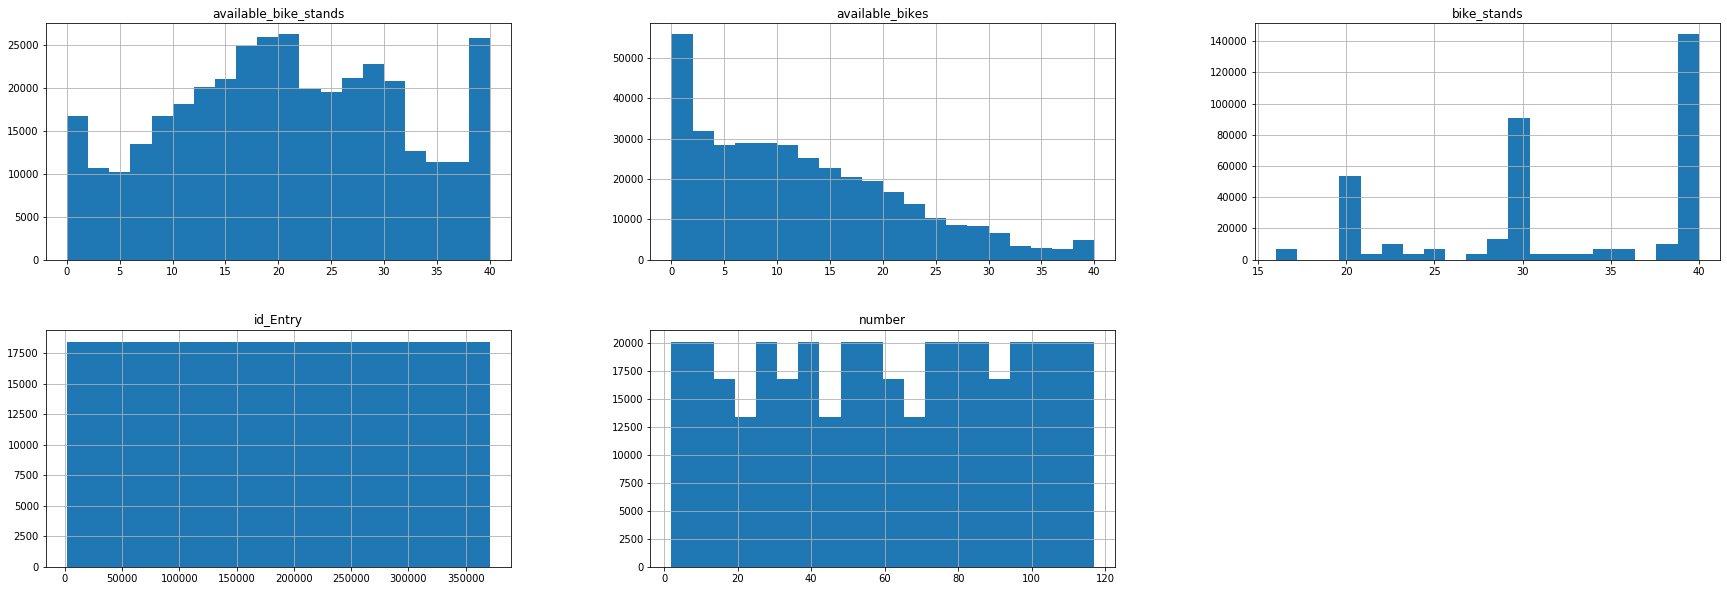

In [154]:
# Plot a histogram summary sheet of the continuous features and save in a pdf file
columns = list(bikeDynamic.select_dtypes(['int64']).columns.values)
bikeDynamic[columns].hist(layout=(2, 3), figsize=(30,10), bins=20)
plt.savefig('continuous_histograms_1-1.pdf')

### 1.3.2 Save Box plot summary sheets for Continuous features into pdf file

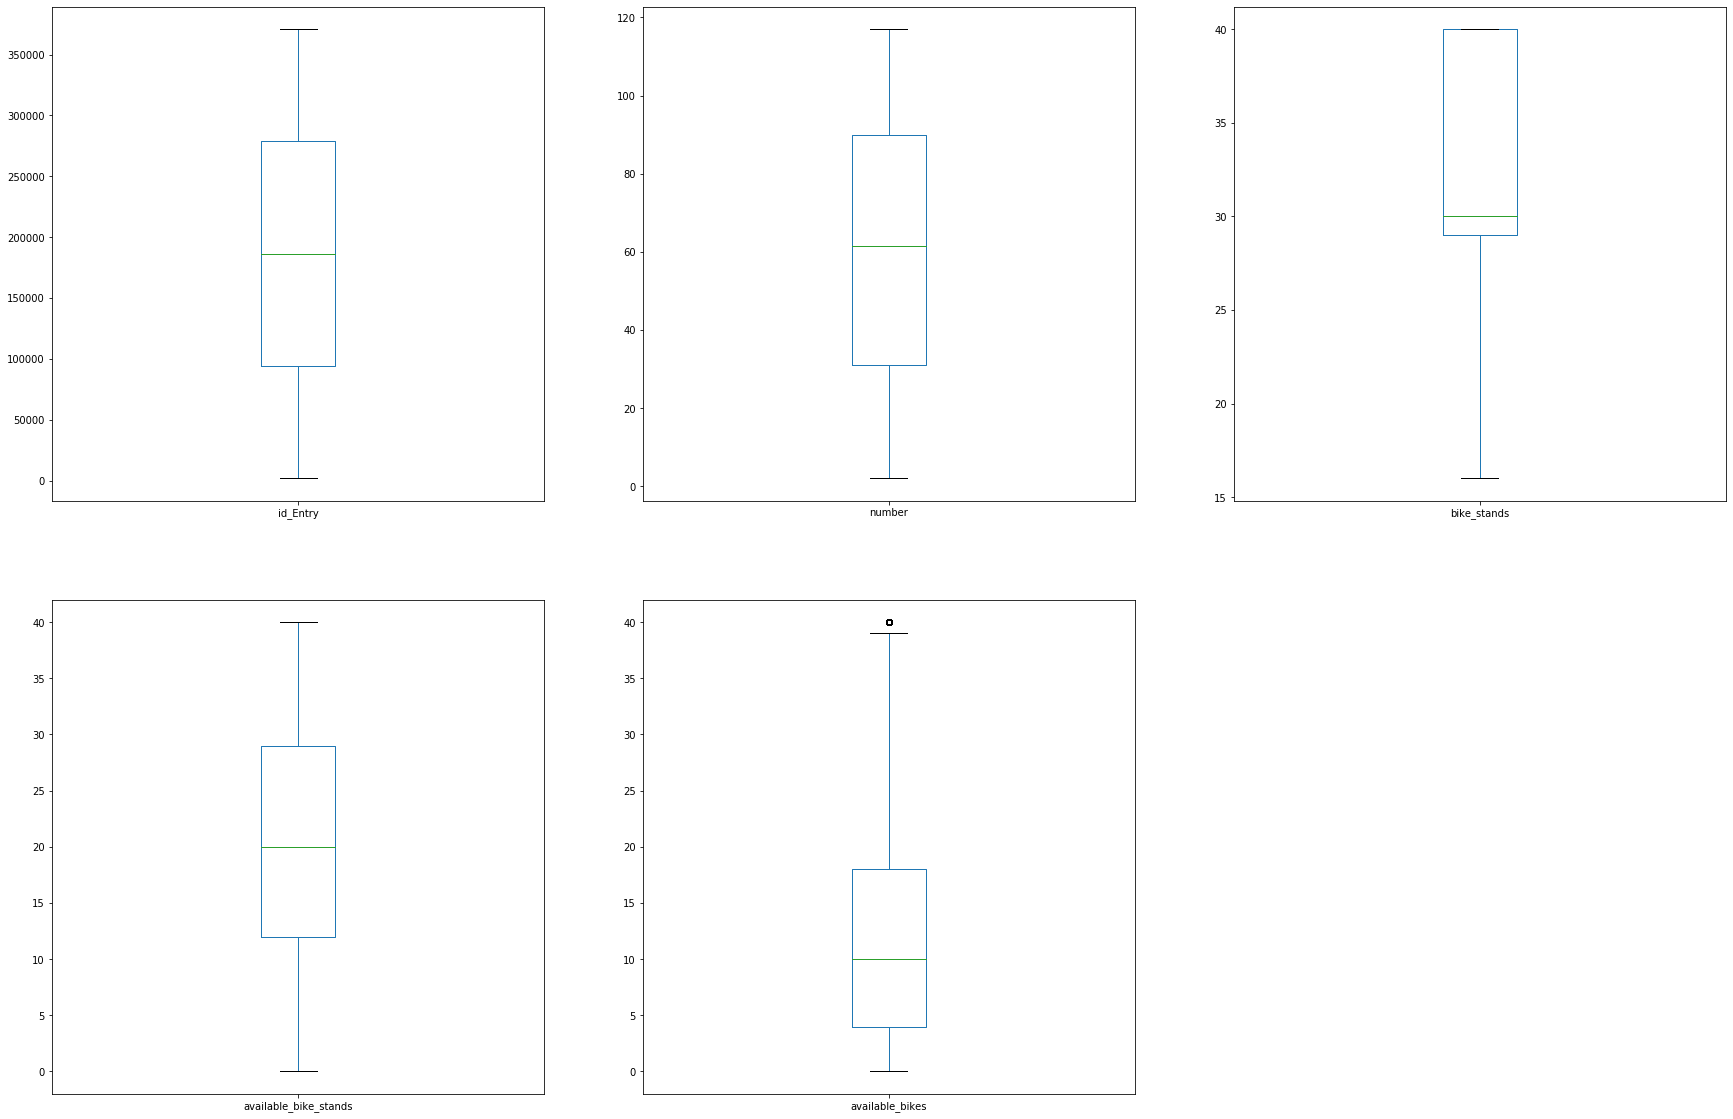

In [155]:
# Plot a histogram summary sheet of the continuous features and save in a pdf file
columns = list(bikeDynamic.select_dtypes(['int64']).columns.values)
bikeDynamic[columns].plot(kind='box', subplots=True, figsize=(30,20), layout=(2,3), sharex=False, sharey=False)
plt.savefig('continuous_box_1-1.pdf')

### 1.3.5 Save Bar plot summary sheets for Catagorical features into pdf file

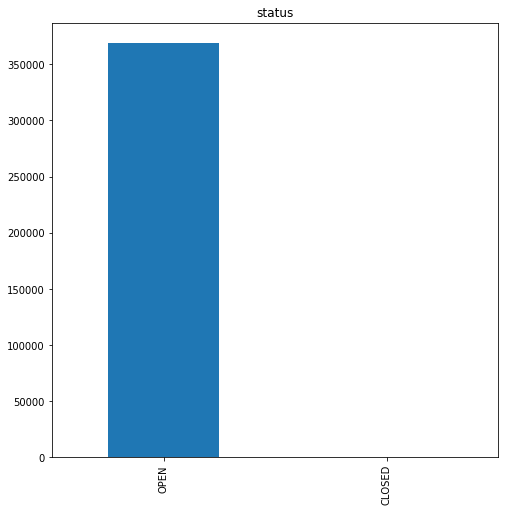

In [156]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
columns = list(bikeDynamic.select_dtypes(['category']).columns.values)
with PdfPages('categorical_bar_1-1.pdf') as pp:
    for column in columns:
        f = bikeDynamic[column].value_counts().plot(kind='bar', figsize=(8,8))
        plt.title(column)
        pp.savefig(f.get_figure())
        plt.show()

# 2. Data Quality Plan

## 2.1 Data findings  

### 2.1.1 Summary of list of issues found in Data Quality Report  

- test_1 states that 18 entries have bad data regarding total number of bike stands at a station.


### 2.1.2 Proposed solutions to rectify identified problems   

- Replace feature bike_stands with value '255' which is greater than maximum value for feature [40] 

## 2.2 Apply solutions to address data quality issues

### 2.2.1 DateTime Intake > DateTime Outcome

In [157]:
dTest = bikeDynamic[["id_Entry","available_bike_stands","available_bikes","bike_stands"]][bikeDynamic["available_bike_stands"].add(bikeDynamic["available_bikes"], axis=0)  >  bikeDynamic["bike_stands"]]
print("Number of rows failing the test: ", dTest.shape[0])
dTest.head(5)

Number of rows failing the test:  18


,id_Entry,available_bike_stands,available_bikes,bike_stands
63885,65630,17,0,16
248795,250540,16,1,16
248905,250650,16,1,16
249125,250870,16,1,16
249235,250980,16,1,16


**Replacing corresponding entries for feature "bike_stands":**

In [158]:
dTest_1 = dTest["id_Entry"]

for data in dTest_1: 
    bikeDynamic.loc[(bikeDynamic.id_Entry == data),'bike_stands']=255

In [159]:
dTest = bikeDynamic[["id_Entry","available_bike_stands","available_bikes","bike_stands"]][bikeDynamic["available_bike_stands"].add(bikeDynamic["available_bikes"], axis=0)  >  bikeDynamic["bike_stands"]]
print("Number of rows failing the test: ", dTest.shape[0])
dTest.head(5)

Number of rows failing the test:  0


,id_Entry,available_bike_stands,available_bikes,bike_stands


## 2.3 Summary of data quality plan



| Feature                  | Data Quality issue | Solution Strategy    |
|:-------------------------|:------------------ |:---------- | 
| id_Entry                 | [Primary key]      | Do nothing    |
| number                   | Nothing            | Do nothing    |
| status                   | Nothing            | Do nothing    |
| bike_stands              | Value inconsistancy for 18 entires | Replace with 255|
| available_bike_stands    | Nothing            | Do nothing    |
| available_bikes          | Nothing            | Do nothing    |
| last_update              | Nothing            | Do nothing    |
| data_entry_timestamp     | Nothing            | Do nothing    |


## 2.4 Save cleaned data to new CSV 

In [160]:
bikeDynamic.to_csv('dBikeD_2.4_cleaned.csv', index=False, index_label = True)

# 3. Feature Exploration

## 3.1 Time series view 

# 4. Feature Engineering

## 4.1 new feature set 1

## 4.2 new feature set 2 

## 4.5 Post processing

### 4.5.1 Print data types 

### 4.5.2 Print discriptive statistics 

**Print statistics for catagorical data**

**Print statistics for continuous data**

**Print statistics for datetime data**

### 4.5.3 Save preprocessed data into new CSV for further analystics stage 